# Wrangling and Visualizing Rain Guage Data from the Community Collaborative Rain Hail and Snow Network (CoCoRaHS)

[CoCoRAHS](https://www.cocorahs.org) is a network of volunteer precipitation observers that covers the US and Canada. Observers report in daily precipitation totals every day at 7 AM or extreme events such as hail or heavy rain over a short period of time. The data is used by groups such as the National Oceanic and Atmospheric Administration and National Weather Service for forecast decision making and research

Back in high school I was an observer in this network and took various observations. However the website for viewing data and submitting observations was severely limited, and only gave relatively basic options on how to view the data and to download data that could be formatted into software like Microsoft Excel. This was extremely frustating as I always wanted to explore the data I was gather in further depth to find additional trends that weren't displayed or provided by the CoCoRAHs site.

## Enter Python & Data Science

After working in university and industry, I learned that both the Data Science & Data Analysis process alongside _Python_ can be used to both gather CoCoRaHS data into a format that can be more flexibly analyzed and create the visualizations that I've was always wanted to make for CoCoRaHS data. The following notebook is designed to show those techniques and make them accessible to the borader data science community.

## Downloading the Data

The data is available in several formats and is available as a file that can be downloaded from the [main CoCoRaHS data page](http://data.cocorahs.org/). However a web form must be filled out in order to get the link to the file and the URL to the file is served via an MS ASP API. So from that URL the various API parameters are able to be inferred and can be used to write functions to satisfy the various data filtering options that are needed.

### Import CSV into Pandas for Visualization and Wrangling

In [231]:
import pandas as pd
csv_url = "http://data.cocorahs.org/export/exportreports.aspx?ReportType=Daily&dtf=1&Format=CSV&State=NC&County=BC&ReportDateType=reportdate&StartDate=5/1/2018&EndDate=5/31/2018&TimesInGMT=True"
daily_data = pd.read_csv(csv_url)

In [232]:
daily_data.head()

,ObservationDate,ObservationTime,EntryDateTime,StationNumber,StationName,Latitude,Longitude,TotalPrecipAmt,NewSnowDepth,NewSnowSWE,TotalSnowDepth,TotalSnowSWE,DateTimeStamp
0,2018-05-31,11:00 AM,2018-05-31 11:21 AM,NC-BC-1,Asheville 5.6 NNW,35.653400,-82.570900,0.42,NA,NA,NA,NA,2018-05-31 12:21 PM
1,2018-05-31,11:00 AM,2018-05-31 02:29 PM,NC-BC-3,Asheville 5.7 NNW,35.653592,-82.572833,0.38,NA,NA,NA,NA,2018-05-31 03:29 PM
2,2018-05-31,10:00 AM,2018-05-31 11:03 AM,NC-BC-4,Fairview 3.8 ENE,35.546000,-82.343000,1.35,NA,NA,NA,NA,2018-05-31 12:03 PM
3,2018-05-31,11:00 AM,2018-05-31 11:42 AM,NC-BC-5,Asheville 2.1 NNW,35.602500,-82.560200,0.42,NA,NA,NA,NA,2018-05-31 12:42 PM
4,2018-05-31,11:00 AM,2018-05-31 11:43 AM,NC-BC-14,Leicester 2 SE,35.626319,-82.676333,0.79,NA,NA,NA,NA,2018-05-31 12:42 PM


In [233]:
daily_data['StationNumber'] = daily_data['StationNumber'].map(str.strip)
daily_data['TotalPrecipAmt'] = daily_data['TotalPrecipAmt'].map(str.strip)
daily_data['TotalPrecipAmt'][daily_data['TotalPrecipAmt'] == 'T'] = '0.0'
daily_data['TotalPrecipAmt'][daily_data['TotalPrecipAmt'] == 'NA'] = '0.0'
daily_data.fillna('0.0')

daily_data['TotalPrecipAmt'] = pd.to_numeric(daily_data['TotalPrecipAmt'])
daily_data['ObservationDate'] = pd.to_datetime(daily_data['ObservationDate'])

/Users/justinreid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/justinreid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [234]:
daily_subset = daily_data[daily_data['StationNumber'] == 'NC-BC-51'].loc[:,['ObservationDate', 'TotalPrecipAmt']]
daily_clean = daily_subset.set_index('ObservationDate').sort_index()
daily_clean.head()

,TotalPrecipAmt
ObservationDate,
2018-05-07,0.00
2018-05-08,0.00
2018-05-09,0.22
2018-05-10,0.01
2018-05-11,0.32


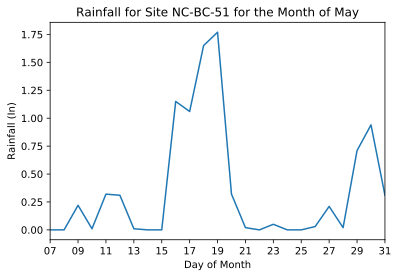

In [235]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot(daily_clean.loc['May 2018',])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.set_xlim(daily_clean.index[0], daily_clean.index[len(daily_clean.index) - 1])
plt.title("Rainfall for Site NC-BC-51 for the Month of May")
plt.xlabel("Day of Month")
plt.ylabel("Rainfall (In)")
plt.show()